# Business Understanding!

In this notebook, we will be analyzing data from Airbnb, which can be downloaded from the following <a href="https://www.kaggle.com/airbnb/seattle" target="_blank">link</a>.

Problem Statements:

1. How does the total price of Airbnb vary over the first and second semesters of 2016?
2. How does the total price of Airbnb vary for each day of the week for the first and second semesters of 2016?
3. How does the mean price by client is distributed over the first and second semesters of 2016?

In this notebook, the above issues will be answered through data analysis.

In [122]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt


In [123]:
print('Numpy version: {0}'.format(np.__version__))
print('Pandas version: {0}'.format(pd.__version__))
print('Seaborn version: {0}'.format(sns.__version__))
print('Matplotlib version: {0}'.format(matplotlib.__version__))


Numpy version: 1.19.2
Pandas version: 1.0.1
Seaborn version: 0.10.0
Matplotlib version: 3.1.3


# Data Understanding!

In [124]:
df=pd.read_csv('calendar.csv')

In [125]:
df.head(10)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
5,241032,2016-01-09,f,NaN
6,241032,2016-01-10,f,NaN
7,241032,2016-01-11,f,NaN
8,241032,2016-01-12,f,NaN
9,241032,2016-01-13,t,$85.00


In [126]:
df.isnull().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

In [127]:

df.duplicated().sum()

0

# There are no duplicates

In [128]:
df.isnull().sum().sum()

459028

In [129]:
df.dtypes.unique()

array([dtype('int64'), dtype('O')], dtype=object)

# Following are the Columns of the dataset

In [130]:
list(df.columns)

['listing_id', 'date', 'available', 'price']

### converting the date column to datetime

In [131]:
df2=df.copy()
df2['date']=pd.to_datetime(df2['date'])    

# Preparing Data 

## Basic Feature Engineering

### creating time features!

In [132]:

df2['year']=df2['date'].dt.year
df2['month']=df2['date'].dt.month
df2['day']=df2['date'].dt.day
df2['weekofday']=df2['date'].dt.weekday

## Dealing with the 'available' column :)

In [133]:
df2['available'].unique()

array(['t', 'f'], dtype=object)

In [134]:
df2['available']=df2['available'].transform(lambda x: True if x=='t' else False)

In [135]:
df2['available'].unique()

array([ True, False])

In [136]:
(df2['available']==False).sum()

459028

In [137]:
df2.isnull().sum()

listing_id         0
date               0
available          0
price         459028
year               0
month              0
day                0
weekofday          0
dtype: int64

# Therefore the number of unavailable prices must be dropped

In [139]:
df2.dropna(inplace=True)

In [140]:
df2.drop(['available'],axis=1,inplace=True)

##  The column price comes with a $ in front of the prices, and in some cases with a comma in undesired places. The below code repairs this :)

In [142]:
df2['price']=df2['price'].replace(to_replace=["$",','], value=['',''], regex=True).str.replace('$','').astype(np.float64)

In [143]:
df2

,listing_id,date,price,year,month,day,weekofday
0,241032,2016-01-04,85.0,2016,1,4,0
1,241032,2016-01-05,85.0,2016,1,5,1
9,241032,2016-01-13,85.0,2016,1,13,2
10,241032,2016-01-14,85.0,2016,1,14,3
14,241032,2016-01-18,85.0,2016,1,18,0
...,...,...,...,...,...,...,...
1393207,10208623,2016-01-06,87.0,2016,1,6,2
1393208,10208623,2016-01-07,87.0,2016,1,7,3
1393211,10208623,2016-01-10,87.0,2016,1,10,6
1393212,10208623,2016-01-11,87.0,2016,1,11,0


# Verifying

In [146]:
df2.price

0          85.0
1          85.0
9          85.0
10         85.0
14         85.0
           ... 
1393207    87.0
1393208    87.0
1393211    87.0
1393212    87.0
1393213    87.0
Name: price, Length: 934542, dtype: float64

# Verifying the types!

In [148]:
df2.dtypes

listing_id             int64
date          datetime64[ns]
price                float64
year                   int64
month                  int64
day                    int64
weekofday              int64
dtype: object

In [149]:
df3=df2.copy()

# Now the Data Analysis Itself!

# Let us analyze according to the first semester!

In [155]:

df3_sem1=df3[(df3['month']==1) | (df3['month']==2) | (df3['month']==3) | (df3['month']==4) | (df3['month']==5) | (df3['month']==6)]
#df3_tri1=df3[(df3['month']==1)]# | (df3['month']==2) | (df3['month']==3)]

In [156]:
#plt.plot(df3_tri1['date'],df3_tri1['price'], '-')

In [157]:
df3_sem1=df3_sem1[df3_sem1['year']==2016]

In [158]:
df3_sem1['sum_price']=df3_sem1.groupby(['date'])['price'].transform(lambda x: x.sum())

# Analysis for the second semester

In [159]:
df3_sem2=df3[(df3['month']==7) | (df3['month']==8) | (df3['month']==9) | (df3['month']==10) | (df3['month']==11) | (df3['month']==12)]

In [160]:
df3_sem2['sum_price']=df3_sem2.groupby(['date'])['price'].transform(lambda x: x.sum())

/home/vagner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


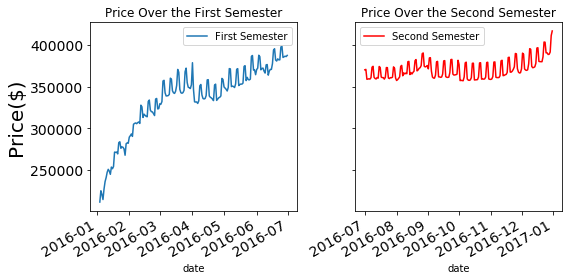

In [161]:
fig = plt.figure(figsize=[8,4])
axes = fig.subplots(nrows=1, ncols=2,sharey=True)
df3_sem1.plot(x='date',y='sum_price',label='First Semester',fontsize=14,ax=axes[0]);
df3_sem2.plot(x='date',y='sum_price',label='Second Semester',fontsize=14,ax=axes[1],color='r');
#plt.title('Price Over Time',size=20)
axes[0].set_ylabel('Price($)',size=20)
axes[0].set_title("Price Over the First Semester")
axes[1].set_title("Price Over the Second Semester")
#plt.xlabel(size=20)
plt.tight_layout()
#plt.savefig('price_overtime_airbnb.jpg')
plt.show()

In the first semester, it can be clearly be seen a trend of quadratic increase of the price with time, while for the second semester it is rather constant, in spite of a slight increase in December.

# We can analyze the evolution of the total amount collected in two semesters.

In [162]:
df3_sem1['weekday_price']=df3_sem1.groupby(['weekofday'])['price'].transform(lambda x: x.sum())

# Second Semester

In [163]:
df3_sem2['weekday_price']=df3_sem2.groupby(['weekofday'])['price'].transform(lambda x: x.sum())

/home/vagner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


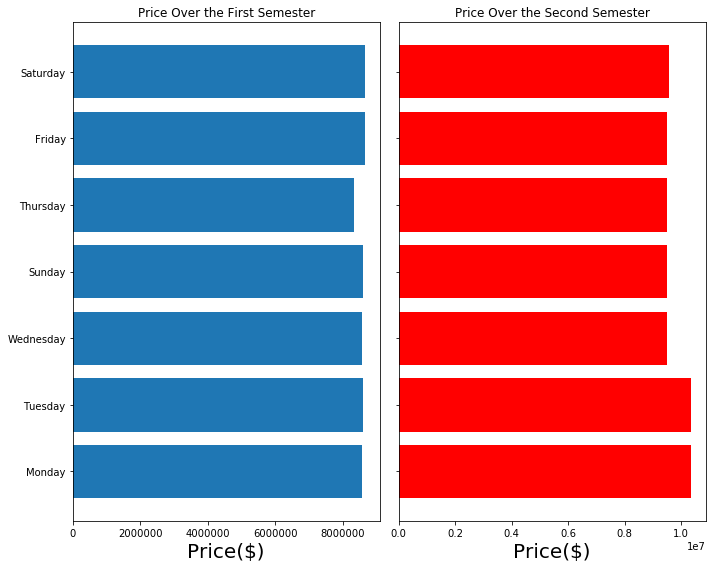

In [164]:
fig = plt.figure(figsize=[10,8])
axes = fig.subplots(nrows=1, ncols=2,sharey=True)
test_names=np.array(['Monday','Tuesday','Wednesday','Sunday','Thursday','Friday','Saturday'])

#plt.barh(df3_tri1['weekofday'].unique(),df3_tri1['weekday_price'].unique(),tick_labels=test_names)
axes[0].set_title("Price Over the First Semester")
axes[0].barh(test_names,df3_sem1['weekday_price'].unique())#plt.
axes[1].barh(test_names,df3_sem2['weekday_price'].unique(),color='r')#plt.
axes[1].set_title("Price Over the Second Semester")
axes[0].set_xlabel('Price($)',size=20)
axes[1].set_xlabel('Price($)',size=20)
#plt.xlabel(size=20)
plt.tight_layout()
#plt.savefig('./barplotsemesters.jpg')
plt.show()

It can be clearly seen that in the first semester the prices are evenly distributed over the days of the week, whereas for the second semester there is a significant increase for Monday and Tuesday.

# Analyzing By Listing_ID!

In [165]:
df3_sem1['listid_price']=df3_sem1.groupby(['listing_id'])['price'].transform(lambda x: x.mean())

In [166]:
print('First Semester Analysis:')
print('Mean: ${0}'.format(df3_sem1['listid_price'].mean()))
print('Std: ${0}'.format(df3_sem1['listid_price'].std()))
print('Maximum: ${0}'.format(df3_sem1['listid_price'].max()))
print('Minimum: ${0}'.format(df3_sem1['listid_price'].min()))



First Semester Analysis:
Mean: $133.26492718174617
Std: $95.56650893880908
Maximum: $1059.9195402298851
Minimum: $20.0


# For the Second Semester 

In [167]:
df3_sem2['listid_price']=df3_sem2.groupby(['listing_id'])['price'].transform(lambda x: x.mean())

/home/vagner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [168]:
print('Second Semester Analysis:')
print('Mean: ${0}'.format(df3_sem2['listid_price'].mean()))
print('Std: ${0}'.format(df3_sem2['listid_price'].std()))
print('Maximum: ${0}'.format(df3_sem2['listid_price'].max()))
print('Minimum: ${0}'.format(df3_sem2['listid_price'].min()))



Second Semester Analysis:
Mean: $142.35078293617767
Std: $107.510310744102
Maximum: $1395.3804347826087
Minimum: $20.0


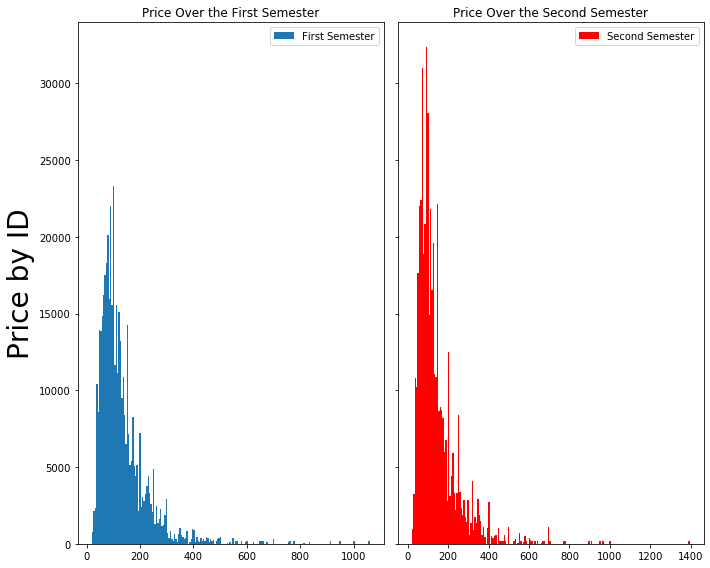

In [169]:
fig = plt.figure(figsize=[10,8])
axes = fig.subplots(nrows=1, ncols=2,sharey=True)
axes[0].hist(df3_sem1['listid_price'],bins=200,label='First Semester');
axes[1].hist(df3_sem2['listid_price'],bins=200,label='Second Semester',color='r');
axes[0].set_ylabel('Price by ID',size=28)
axes[0].set_title("Price Over the First Semester")
axes[1].set_title("Price Over the Second Semester")
axes[0].legend()
axes[1].legend()
#plt.xlabel(size=20)
plt.tight_layout()
#plt.savefig('./hists_semester.jpg')

plt.show()

The distributions are clearly right-skewed, being rather similar in their shapes.
The mean, minimum and maximum values, as well as the standard deviation are given for each semester shown in the notebook. Essentially, during the second semester, there are larger mean and maximum values, but also accompanied but also by a broader standard deviation.

# Conclusion

For the first semester of 2016, the total sales of Airbnb was increasing fastly, but in the second semester, it reached a plateau. The analysis of the total price by day of the week showed that in the first semester the sales are evenly distributed, while in the second semester they are biased toward Monday and Tuesday. Analysis of the amount spent by a client showed that in the second amount the mean and maximum values were larger than in the first semester, however, also more spread (larger standard deviation).

# THANK YOU FOR READING THE NOTEBOOK :)